In [43]:
import tempfile
import easyocr
reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [44]:
data={"name":"",
      "fathers_name":"",
      "dob":"",
      "pan_numer":""}

In [45]:
from ultralytics import  YOLO

In [46]:
# model = YOLO('/runs/detect/train25/weights/best.pt') 
model = YOLO('runs/detect/train21/weights/best.pt') 



In [47]:
import cv2

In [48]:
img_name =['WhatsApp Image 2023-07-08 at 21.09.34.jpeg']
image_url='https://legalnitiai.s3.ap-south-1.amazonaws.com/image/WhatsApp+Image+2023-08-12+at+15.50.17.jpg'
# image_url = 'https://legalnitiai.s3.ap-south-1.amazonaws.com/image/WhatsApp+Image+2023-08-12+at+15.51.13.jpg'
t = model.predict(image_url, save=True, imgsz=640, conf=0.1, save_txt = True, save_conf= True,show_labels= False)


Found https://legalnitiai.s3.ap-south-1.amazonaws.com/image/WhatsApp+Image+2023-08-12+at+15.50.17.jpg locally at WhatsApp+Image+2023-08-12+at+15.50.17.jpg
image 1/1 /home/pratik/Desktop/pratik_ocr/WhatsApp+Image+2023-08-12+at+15.50.17.jpg: 416x640 1 dob, 1 father-s name, 1 name, 3 pan numbers, 173.8ms
Speed: 4.0ms preprocess, 173.8ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict39
1 label saved to runs/detect/predict39/labels


In [49]:
t

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'dob', 1: 'father-s name', 2: 'name', 3: 'pan number'}
 orig_img: array([[[194, 214, 225],
         [194, 214, 225],
         [194, 214, 225],
         ...,
         [173, 188, 197],
         [173, 188, 197],
         [173, 188, 197]],
 
        [[194, 214, 225],
         [194, 214, 225],
         [194, 214, 225],
         ...,
         [173, 188, 197],
         [173, 188, 197],
         [173, 188, 197]],
 
        [[194, 214, 225],
         [194, 214, 225],
         [194, 214, 225],
         ...,
         [172, 187, 196],
         [173, 188, 197],
         [173, 188, 197]],
 
        ...,
 
        [[193, 213, 224],
         [193, 213, 224],
         [193, 213, 224],
         ...,
         [174, 189, 198],
         [174, 189, 198],
         [174, 189, 198]],
 
        [[193, 213, 224],
         [193, 213, 224],
       

In [50]:
img_path = []
label_path = []
img_paths=[]
label_paths=[]

# Assuming you have a single URL for the image
# img_url = "https://example.com/image.jpg"

# Extract the image name from the URL
img_name = image_url.split('/')[-1]

for pred in t:
    labels = pred.names  # Assuming `names` is a list of class labels
    
    img_path = pred.save_dir + '/' + img_name
    label_path = pred.save_dir + '/labels/' + '.'.join(img_name.split('.')[:-1]) + '.txt'
    
    img_paths.append(img_path)
    label_paths.append(label_path)


In [51]:
label_paths

['runs/detect/predict39/labels/WhatsApp+Image+2023-08-12+at+15.50.17.txt']

In [52]:
import matplotlib.pyplot as plt
from PIL import Image 

In [53]:
import urllib

In [54]:
import urllib.request,io

In [55]:
path = io.BytesIO(urllib.request.urlopen(image_url).read())

In [56]:
bg=Image.open(path)

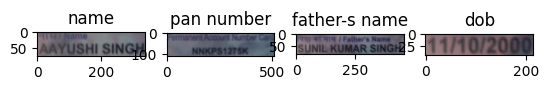

In [134]:
detect_list = []
for x in range(len(img_paths)):
    with  open(label_paths[x],'r') as file:
        label = file.readlines()
    img = Image.open(path)
    # img.show()
    height  = img.height
    width = img.width
    detect_dict = {}
    for i in label:
        value = [float(a) for a in i.split()]
        sw = int(width * float(value[1] - value[3]/2))
        ew = int(width * float(value[1] + value[3]/2))
        sh = int(height * float(value[2] - value[4]/2))
        eh = int(height * float(value[2] + value[4]/2))
        if labels[int(value[0])] not in detect_dict:
            detect_dict[labels[int(value[0])]]=[[img.crop((sw, sh, ew, eh)),value[5]]]
        else:
            detect_dict[labels[int(value[0])]].append([img.crop((sw, sh, ew, eh)),value[5]])
        # img.crop((sw, sh, ew, eh)).show()
    l = len(detect_dict)
    i = 0
    for x,j in detect_dict.items():
        plt.subplot(1,l,i+1)
        plt.imshow(j[0][0])
        plt.title(x)
        i +=1
    detect_list.append(detect_dict)
    plt.show()

In [135]:
detect_list

[{'name': [[<PIL.Image.Image image mode=RGB size=337x76>, 0.914259]],
  'pan number': [[<PIL.Image.Image image mode=RGB size=512x110>, 0.909069],
   [<PIL.Image.Image image mode=RGB size=214x85>, 0.600133],
   [<PIL.Image.Image image mode=RGB size=225x103>, 0.129328]],
  'father-s name': [[<PIL.Image.Image image mode=RGB size=454x85>, 0.883481]],
  'dob': [[<PIL.Image.Image image mode=RGB size=214x42>, 0.782347]]}]

In [136]:
type(detect_list[0]['name'][0][0])

PIL.Image.Image

In [137]:
detect_list

[{'name': [[<PIL.Image.Image image mode=RGB size=337x76>, 0.914259]],
  'pan number': [[<PIL.Image.Image image mode=RGB size=512x110>, 0.909069],
   [<PIL.Image.Image image mode=RGB size=214x85>, 0.600133],
   [<PIL.Image.Image image mode=RGB size=225x103>, 0.129328]],
  'father-s name': [[<PIL.Image.Image image mode=RGB size=454x85>, 0.883481]],
  'dob': [[<PIL.Image.Image image mode=RGB size=214x42>, 0.782347]]}]

In [138]:
detect_list1=[x.copy() for x in detect_list]

In [139]:

for f,i in enumerate(detect_list):
    for x,y in i.items():
        tl = []
        highest_confidence = 0.0
        best_result = ""
        for t in y:
            
            temp_image_path = tempfile.NamedTemporaryFile(suffix='.jpg').name
            # print(temp_image_path)
            t[0].save(temp_image_path, format='JPEG')
            # temp_image_path
            results = reader.readtext(temp_image_path)

            for detection in results:
                text = detection[1]
                confidence = t[1]  # Confidence score
                
            if confidence > highest_confidence:
                highest_confidence = confidence
                best_result = text
            tl = [best_result,confidence]
        detect_list1[f][x] = tl

In [140]:
detect_list1

[{'name': ['AAYUSHI SINGH', 0.914259],
  'pan number': ['NNKPSiZ7SK', 0.129328],
  'father-s name': ['SUNIL KUMAR SINGH', 0.883481],
  'dob': ['11/10/2000', 0.782347]}]